<a href="https://colab.research.google.com/github/Kammarianand/machine_learning_models_projects/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_blobs

In [4]:
x,y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)

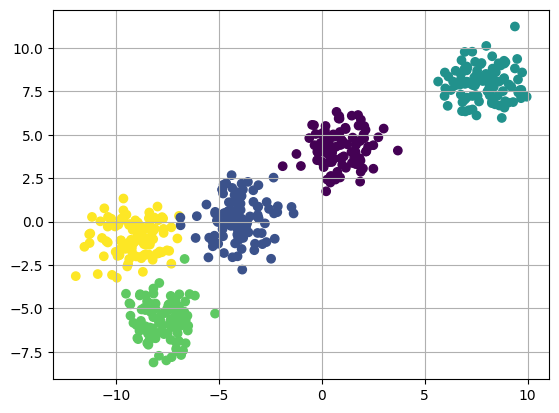

In [6]:
fig = plt.figure(0)
plt.grid(True)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [7]:
k = 5
colors = ['green','yellow','blue','cyan','orange']

In [62]:
clusters = {}
for idx in range(k):
    centers = 10*(2*np.random.random((x.shape[1],))-1)
    points = []
    cluster = {
        'centers' : centers,
        'points' : [],
        'colors': colors[idx]
    }
    clusters[idx] = cluster



In [63]:
clusters

{0: {'centers': array([-5.43730222, -1.45045097]),
  'points': [],
  'colors': 'green'},
 1: {'centers': array([6.71453244, 7.36047679]),
  'points': [],
  'colors': 'yellow'},
 2: {'centers': array([2.26507672, 7.1906444 ]),
  'points': [],
  'colors': 'blue'},
 3: {'centers': array([-8.60828455,  1.39393899]),
  'points': [],
  'colors': 'cyan'},
 4: {'centers': array([ 5.80620123, -9.61978068]),
  'points': [],
  'colors': 'orange'}}

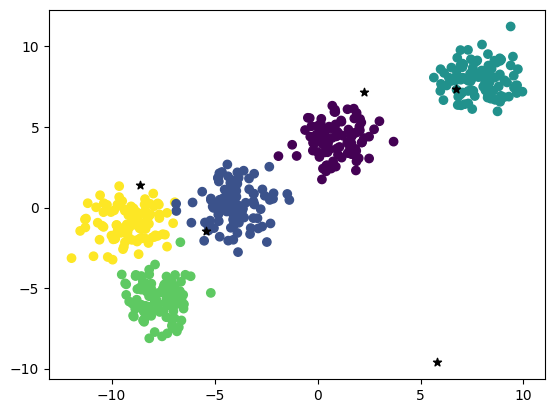

In [64]:
plt.scatter(x[:,0],x[:,1],c=y)
for i in clusters:
  center = clusters[i]['centers']
  plt.scatter(center[0],center[1],marker='*',color='black')
plt.show()

In [65]:
def distance(v1,v2):
  return np.sqrt(np.sum((v1-v2)**2))

In [70]:
def assing_clstr():
  for idx in range(x.shape[0]):
    dist = []
    curr_x = x[idx]
    for i in range(k):
      d = distance(curr_x,clusters[i]['centers'])
      dist.append(d)
      curr_cluster = np.argmin(dist)
      clusters[curr_cluster]['points'].append(curr_x)

In [71]:
assing_clstr()

In [72]:
clusters

{0: {'centers': array([-5.43730222, -1.45045097]),
  'points': [array([-6.94238952, -6.8807223 ]),
   array([-6.94238952, -6.8807223 ]),
   array([-6.94238952, -6.8807223 ]),
   array([-6.94238952, -6.8807223 ]),
   array([-6.94238952, -6.8807223 ]),
   array([8.14492336, 7.52724561]),
   array([-3.61995355, -0.07726913]),
   array([-3.61995355, -0.07726913]),
   array([-3.61995355, -0.07726913]),
   array([-3.61995355, -0.07726913]),
   array([-3.61995355, -0.07726913]),
   array([-8.91918262, -6.772189  ]),
   array([-8.91918262, -6.772189  ]),
   array([-8.91918262, -6.772189  ]),
   array([-8.91918262, -6.772189  ]),
   array([-8.91918262, -6.772189  ]),
   array([-7.37151112, -5.0506429 ]),
   array([-7.37151112, -5.0506429 ]),
   array([-7.37151112, -5.0506429 ]),
   array([-7.37151112, -5.0506429 ]),
   array([-7.37151112, -5.0506429 ]),
   array([-4.65743008,  0.05077508]),
   array([-4.65743008,  0.05077508]),
   array([-4.65743008,  0.05077508]),
   array([-4.65743008,  0.050

In [83]:
def update_clstr():
  for idx in range(k):
    pts = np.array(clusters[idx]['points'])
    if pts.shape[0] > 0:
      new_center = pts.mean(axis=0)
      clusters[idx]['centers']= new_center
      clusters[idx][' '] = []

In [84]:
def plot_clusters():
  for i in clusters:
    pts = np.array(clusters[i]['points'])
    try:
      plt.scatter(pts[:,0],pts[:,1],c=clusters[i]['colors'])
    except:
      pass
    center = clusters[i]['centers']
    plt.scatter(center[0],center[1],c='black',marker="*")


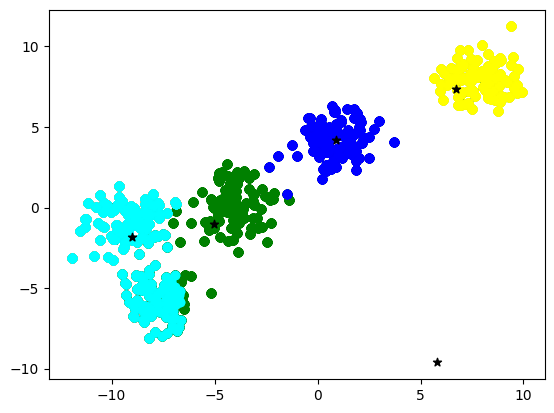

In [88]:
assing_clstr()
update_clstr()
plot_clusters()

In [89]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)

In [90]:
x,y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=3)


In [91]:
km.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [93]:
centers = km.cluster_centers_

In [95]:
labels = km.labels_

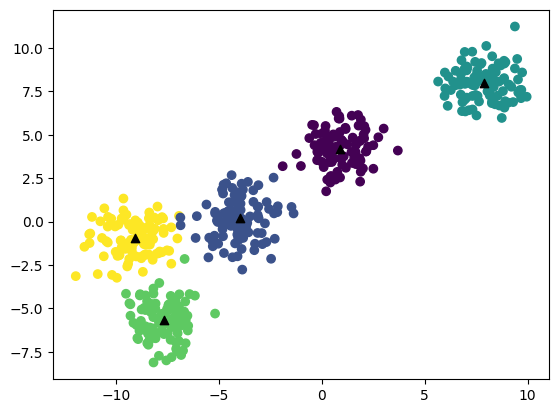

In [101]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.scatter(centers[:,0],centers[:,1],c='black',marker='^')
plt.show()